In [1]:
import numpy as np
import pandas as pd
import processi_EMGIT as em

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

Calcolo di W e ottimizzazione per Hurst exponent per Modulus Wiener volatility SENZA RUMORE >300
 =======
 H=1/3.818182

In [15]:

s=em.gbm_mod(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,300,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])

In [31]:
#REALIZED VOL PER MOD #NOISE
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrmod=[]
for p in range(len(P)):
    Hrmod.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(f,76,P[p]))**2
min(w)
data=pd.DataFrame(w,index=Hrmod,columns=['W()'])
data['P']=P
data[ data['W()'] <= min(w) ]



,W(),P
1.0,0.002857,1.0


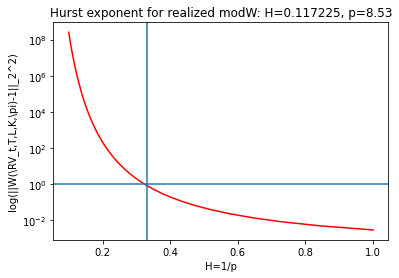

In [32]:
plt.semilogy(Hrmod,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(||W(\RV_t,T,L,K,\pi)-1||_2^2)')
plt.title('Hurst exponent for realized modW: H=0.117225, p=8.53')
plt.axvline(x=0.331081	, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [66]:
#REALIZED VOL PER MOD #DENOISED
P=np.linspace(1,15)
w=np.zeros(len(P))
HrmodNon=[]
for p in range(len(P)):
    HrmodNon.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W_1(f,len(f),10,P[p]))**2
min(w)
data=pd.DataFrame(w,index=HrmodNon,columns=['W()'])
data['P']=P
data[ data['W()'] <= min(w) ]

,W(),P
1.0,0.038072,1.0


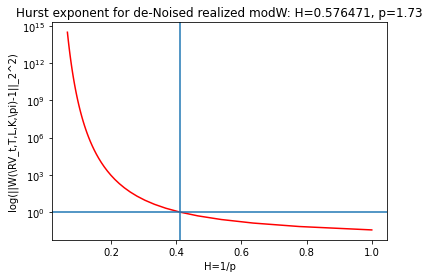

In [68]:
plt.semilogy(HrmodNon,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(||W(\RV_t,T,L,K,\pi)-1||_2^2)')
plt.title('Hurst exponent for de-Noised realized modW: H=0.576471, p=1.73')
plt.axvline(x=0.411765, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [70]:
#INSTANT VOL PER MOD
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrsig=[]
for p in range(len(P)):
    Hrsig.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(s[1],23399,P[p]))**2
min(w)
datasig=pd.DataFrame(w,index=P,columns=['W()_sig'])
datasig[ datasig['W()_sig'] == min(w) ]

,W()_sig
1.0,0.000033


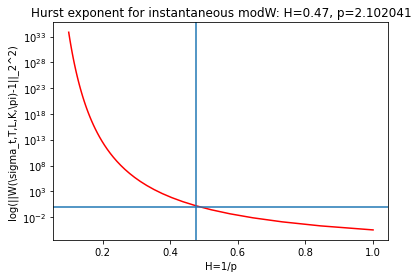

In [71]:
plt.semilogy(Hrsig,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
plt.title('Hurst exponent for instantaneous modW: H=0.47, p=2.102041')
plt.axvline(x=1/2.102041, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

Calcolo di W e ottimizzazione per Hurst exponent per Exp OU volatility
 =======

In [34]:
s=em.gbm_expOU(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
r2=em.calcolaRendimenti(s[0],len(s[0]))
fOU=em.realVol(r2,300,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])

In [44]:
#No noise
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrouno=[]
for p in range(len(P)):
    Hrouno.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(fOU,76,P[p]))**2
min(w)
dataOU=pd.DataFrame(w,index=P,columns=['W()'])
dataOU['H']=Hrouno
dataOU[ dataOU['W()'] <= min(w)]


,W(),H
1.0,0.016527,1.0


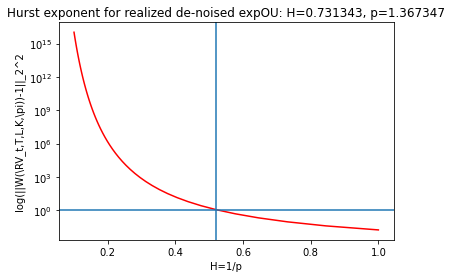

In [45]:
plt.semilogy(Hrouno,w,'r')
plt.ylabel('log(||W(\RV_t,T,L,K,\pi))-1||_2^2')
plt.xlabel('H=1/p')
#plt.annotate('Our', xy=(0.2, 105), xytext=(0.2, 105))
plt.title('Hurst exponent for realized de-noised expOU: H=0.731343, p=1.367347')
plt.axvline(x=0.521277, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [77]:
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrou=[]
for p in range(len(P)):
    Hrou.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(fOU,30,P[p]))**2
min(w)
dataOU=pd.DataFrame(w,index=P,columns=['W()'])
dataOU['H']=Hrou
dataOU[ dataOU['W()'] <= min(w)]

,W(),H
1.0,0.016747,1.0


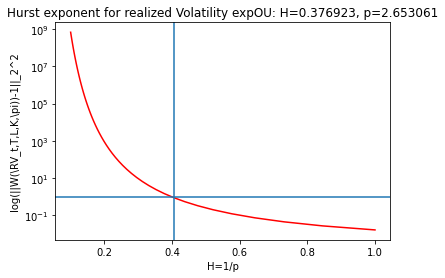

In [78]:
plt.semilogy(Hrou,w,'r')
plt.ylabel('log(||W(\RV_t,T,L,K,\pi))-1||_2^2')
plt.xlabel('H=1/p')
#plt.annotate('Our', xy=(0.2, 105), xytext=(0.2, 105))
plt.title('Hurst exponent for realized Volatility expOU: H=0.376923, p=2.653061')
plt.axvline(x=0.404959, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [59]:
s=em.gbm_expOU(100,1,23400)
P=np.linspace(1,3)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(s[1],23399,P[p]))**2
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]


,W()_sigOU
1.0,0.000033


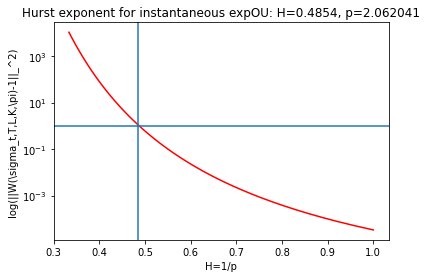

In [60]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(||W(\sigma_t,T,L,K,\pi)-1||_^2)')
#plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst exponent for instantaneous expOU: H=0.4854, p=2.062041')
plt.axvline(x=1/2.061224 , ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()


In [16]:
#logify = lambda arr: np.log(arr)
#dataOU.apply(logify).plot()
#plt.show()
#datasigOU.apply(logify).plot()
#plt.show()

In [17]:
#plt.semilogx(dataOU)
##invert_xaxis()
##plt.invert_yaxis()
#plt.show()
#plt.semilogx(datasigOU)
#plt.show()

In [18]:
#logw=np.zeros(len(w))
#hurst=np.zeros(len(P))
#for i in range(len(w)):
#    logw[i]=np.log(w[i])
#for i in range(len(P)):
#    hurst[i]=1/P[i]
#datatoplot=pd.DataFrame(logw,index=hurst,columns=['log(W)'])
#datatoplot.describe()